# U.S. Census Data API in Python

by Avery Fernandez

The U.S. Census Data API provides programmatic access to demographic, economic, and geographic data collected by the U.S. Census Bureau. It enables users to retrieve and analyze a wide variety of data sets, including Census surveys and population statistics.

Please see the following resources for more information on API usage:
- Documentation
    - <a href="https://www.census.gov/data/developers/data-sets.html" target="_blank">U.S. Census Bureau API Datasets</a>
    - <a href="https://www.census.gov/data/developers/guidance/api-user-guide.html" target="_blank">U.S. Census Bureau API User Guide</a>
    - <a href="https://www.census.gov/data/developers/about.html" target="_blank">U.S. Census Bureau API Overview</a>
    - <a href="https://api.census.gov/data.html" target="_blank">U.S. Census Data Discovery Tool</a>
- Terms
    - <a href="https://www.census.gov/data/developers/about/terms-of-service.html" target="_blank">U.S. Census Bureau API Terms of Service</a>
- Data Reuse
    - <a href="https://www.census.gov/about/policies/open-gov/open-data.html" target="_blank">U.S. Census Bureau Open Data Policy</a>

_**NOTE:**_ The U.S. Census Bureau Data API limits requests to a maximum of 500 calls per IP address per day without an API key; however, users can request an API key for increased limits.

*These recipe examples were tested on May 7, 2025.*

## Setup

### Import Libraries

The following external libraries need to be installed into your environment to run the code examples in this tutorial:
* <a href="https://github.com/psf/requests" target="_blank">requests</a>
* <a href="https://github.com/theskumar/python-dotenv" target="_blank">python-dotenv</a>
* <a href="https://github.com/ipython/ipykernel" target="_blank">ipykernel</a>
* <a href="https://github.com/matplotlib/matplotlib" target="_blank">matplotlib</a>

We import the libraries used in this tutorial below:

In [2]:
from time import sleep
import requests
from pprint import pprint
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

### Import API Key

An API key is required to access the U.S. Census Data API. You can sign up for one at the <a href="https://api.census.gov/data/key_signup.html" target="_blank">Key Signup page</a>.

We keep our API key in a separate file, a `.env` file, and use the `dotenv` library to access it. If you use this method, create a file named `.env` in the same directory as this notebook and add the following line to it:

```text
CENSUS_API_KEY=PUT_YOUR_API_KEY_HERE
```

In [3]:
load_dotenv()
try:
    API_KEY = os.environ["CENSUS_API_KEY"]
except KeyError:
    print("API key not found. Please set 'CENSUS_API_KEY' in your .env file.")
else:
    print("Environment and API key successfully loaded.")

Environment and API key successfully loaded.


## 1. Get Population Estimates of Counties by State

*Note: includes Washington, D.C. and Puerto Rico*

For obtaining data from the Census API, it is helpful to first obtain a list of state IDs:

In [4]:
# Set the base URL that will be used throughout this tutorial
BASE_URL = "https://api.census.gov/data/"
# The parameters specify what data we want to retrieve
params = {
    "get": "NAME",
    "for": "state:*",   # This will grab the names of all states in the US
    "key": API_KEY
}

# Make the request to the Census API
try:
    response = requests.get(BASE_URL + "2019/pep/population", params=params)
    # Raise an error for bad responses
    response.raise_for_status()  
    # Get the JSON data from the response
    state_ids = response.json()
    print(len(state_ids))
# Handle any errors that occur during the request
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
    state_ids = None

53


In [5]:
# Show first 10
if state_ids:
    pprint(state_ids[:10])  

[['NAME', 'state'],
 ['Alabama', '01'],
 ['Alaska', '02'],
 ['Arizona', '04'],
 ['Arkansas', '05'],
 ['California', '06'],
 ['Colorado', '08'],
 ['Delaware', '10'],
 ['District of Columbia', '11'],
 ['Connecticut', '09']]


In [6]:
# Remove heading from data
if state_ids:
    state_ids = state_ids[1:]
    pprint(state_ids[0:10])

[['Alabama', '01'],
 ['Alaska', '02'],
 ['Arizona', '04'],
 ['Arkansas', '05'],
 ['California', '06'],
 ['Colorado', '08'],
 ['Delaware', '10'],
 ['District of Columbia', '11'],
 ['Connecticut', '09'],
 ['Florida', '12']]


Now we can loop through each state and pull their individual population data:

In [7]:
# Loop through the states and get the population for each county in each state
state_population = {}

# Check to make sure state_ids is not None before proceeding
if state_ids:
    # Loop through each state
    for states in state_ids:
        state_name = states[0]

        params = {
            "get": "NAME,POP",
            "for": "county:*",
            "in": f"state:{states[1]}",
            "key": API_KEY
        }
        try:
            response = requests.get(BASE_URL + "2019/pep/population", params=params)
            sleep(1)  
            # Raise an error for bad responses
            response.raise_for_status()  
            data = response.json()[1:]
        except requests.exceptions.RequestException as e:
            print(f"An error occurred: {e}")
            data = None

        # Create a dictionary to hold the population of counties in the state
        counties_population = {}
        if data:
            for county in data:
                # Extract county name by removing state name and the comma
                county_name = county[0][:-len(state_name)-2]
                # Extract county population, converting to int or NaN if not available
                county_population = int(county[1] or 'nan')
                # Add the county name and population to the dictionary
                counties_population[county_name] = county_population
            # Add the counties population to the state population dictionary
            state_population[state_name] = counties_population

In [9]:
# Show data for Alabama
state_population["Alabama"]

{'St. Clair County': 89512,
 'Cullman County': 83768,
 'Houston County': 105882,
 'Tuscaloosa County': 209355,
 'Coffee County': 52342,
 'Chilton County': 44428,
 'Coosa County': 10663,
 'Etowah County': 102268,
 'Lamar County': 13805,
 'Butler County': 19448,
 'Walker County': 63521,
 'Greene County': 8111,
 'Bullock County': 10101,
 'Chambers County': 33254,
 'Monroe County': 20733,
 'Lawrence County': 32924,
 'Lee County': 164542,
 'Marion County': 29709,
 'Pickens County': 19930,
 'Sumter County': 12427,
 'Jefferson County': 658573,
 'Choctaw County': 12589,
 'Franklin County': 31362,
 'Marengo County': 18863,
 'Russell County': 57961,
 'Cherokee County': 26196,
 'Covington County': 37049,
 'Crenshaw County': 13772,
 'Dallas County': 37196,
 'Lauderdale County': 92729,
 'Lowndes County': 9726,
 'Macon County': 18068,
 'Limestone County': 98915,
 'Shelby County': 217702,
 'Winston County': 23629,
 'Baldwin County': 223234,
 'Elmore County': 81209,
 'Jackson County': 51626,
 'Tallade

## 2. Get Population Estimates Over a Range of Years

We can use similar code as before, but now loop through different population estimate datasets by year. Here are the specific APIs used:

<a href="https://api.census.gov/data/2015/pep/population/examples.html" target="_blank">Vintage 2015 Population Estimates</a>

<a href="https://api.census.gov/data/2016/pep/population/examples.html" target="_blank">Vintage 2016 Population Estimates</a>

<a href="https://api.census.gov/data/2017/pep/population/examples.html" target="_blank">Vintage 2017 Population Estimates</a>

In [11]:
state_population = {}

if state_ids:
    # Goes through datasets for 2015, 2016, 2017
    for states in state_ids:

        annual_populations = {}
        for year in range(2015, 2018):
            stateName = states[0]
            params = {
                "get": "GEONAME,POP",
                "for": "county:*",
                "in": f"state:{states[1]}",
                "key": API_KEY
            }

            try:
                response = requests.get(
                    BASE_URL + str(year) + "/pep/population", 
                    params=params
                )
                sleep(1)  
                # Raise an error for bad responses
                response.raise_for_status()  
                data = response.json()[1:]
            except requests.exceptions.RequestException as e:
                print(f"An error occurred: {e}")
                data = None

            counties_population = {}
            if data:
                for county in data:
                    county_name = county[0][:-len(stateName)-2]
                    county_population = int(county[1] or 'nan')
                    counties_population[county_name] = county_population

            annual_populations[year] = counties_population
        state_population[stateName] = annual_populations

In [12]:
# Show Alabama data
pprint(state_population["Alabama"][2015])

{'Autauga County, Alabama, East South Central, South, Unit': 55347,
 'Baldwin County, Alabama, East South Central, South, Unit': 203709,
 'Barbour County, Alabama, East South Central, South, Unit': 26489,
 'Bibb County, Alabama, East South Central, South, Unit': 22583,
 'Blount County, Alabama, East South Central, South, Unit': 57673,
 'Bullock County, Alabama, East South Central, South, Unit': 10696,
 'Butler County, Alabama, East South Central, South, Unit': 20154,
 'Calhoun County, Alabama, East South Central, South, Unit': 115620,
 'Chambers County, Alabama, East South Central, South, Unit': 34123,
 'Cherokee County, Alabama, East South Central, South, Unit': 25859,
 'Chilton County, Alabama, East South Central, South, Unit': 43943,
 'Choctaw County, Alabama, East South Central, South, Unit': 13170,
 'Clarke County, Alabama, East South Central, South, Unit': 24675,
 'Clay County, Alabama, East South Central, South, Unit': 13555,
 'Cleburne County, Alabama, East South Central, South

## 3. Plot Population Change

This data is based off the <a href="https://api.census.gov/data/2021/pep/population/examples.html" target="_blank">2021 Population Estimates</a> dataset.

The percentage change in population is from July 1, 2020 to July 1, 2021 for states (includes Washington, D.C. and Puerto Rico)

In [13]:
params = {
    "get": "NAME,POP_2021,PPOPCHG_2021",
    "for": "state:*",
    "key": API_KEY
}

try:
    response = requests.get(BASE_URL + "2021/pep/population", params=params)
    # Raise an error for bad responses
    response.raise_for_status()  
    data = response.json()[1:]
    # Sort by the state name
    data.sort()
    print(len(data))
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")
    data = None

52


In [14]:
if data:
    pprint(data[0:10])

[['Alabama', '5039877', '0.2999918604', '01'],
 ['Alaska', '732673', '0.0316749062', '02'],
 ['Arizona', '7276316', '1.3698828613', '04'],
 ['Arkansas', '3025891', '0.4534511286', '05'],
 ['California', '39237836', '-0.6630474360', '06'],
 ['Colorado', '5812069', '0.4799364073', '08'],
 ['Connecticut', '3605597', '0.1482392938', '09'],
 ['Delaware', '1003384', '1.1592057958', '10'],
 ['District of Columbia', '670050', '-2.9043911470', '11'],
 ['Florida', '21781128', '0.9791222337', '12']]


In [15]:
# Prepare data for plotting
stateName = []
population = []
populationChange = []
for states in data:
    stateName.append(states[0])
    population.append(int(states[1]) or 'nan')
    populationChange.append(float(states[2] or 'nan'))

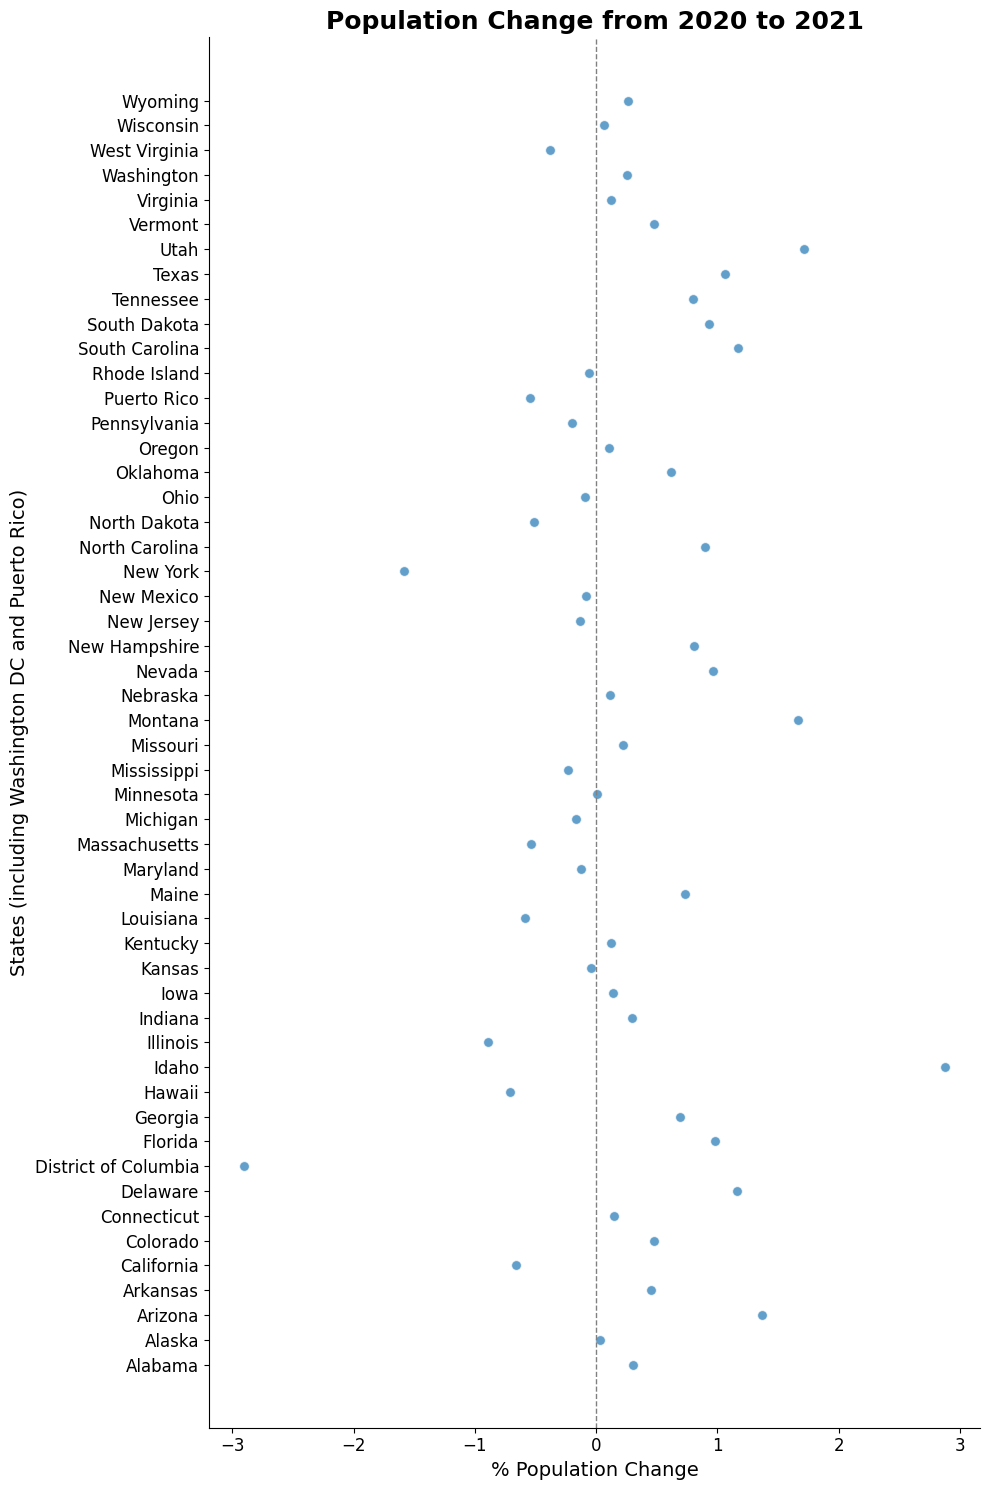

In [16]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 15))

# Create the scatter plot with enhanced marker style
ax.scatter(
    populationChange, 
    stateName, 
    color="#1f77b4",
    alpha=0.7,
    s=50,
    edgecolor='white',
    linewidth=0.8
)

# Add a vertical line at x=0 for reference
ax.axvline(0, color='gray', linestyle='--', linewidth=1)

# Set titles and labels with larger fonts and bold title for emphasis
ax.set_title("Population Change from 2020 to 2021", fontsize=18, fontweight='bold', color='k')
ax.set_xlabel("% Population Change", fontsize=14, color='k')
ax.set_ylabel("States (including Washington DC and Puerto Rico)", fontsize=14, color='k')

# Remove top and right spines for a cleaner appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Increase tick label sizes
ax.tick_params(axis='both', which='major', labelsize=12)

# Improve spacing for a tight layout
plt.tight_layout()

# Display the plot
plt.show()